In [110]:
import glob, os
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot as plt
from scipy.stats import normaltest
import numpy as np
from scipy import stats


homePath="/home/gelou/Desktop/MSc/Applied_Data_Science/KnnNoiseExperiments/ELAResults"
os.chdir(homePath)

df = DataFrame()

files=glob.glob("10/*")
dict10={}
for f in files:
    
    filepath=homePath +"/"+f
    df=read_csv(filepath,index_col=None, header=None)
    dict10[f]=df

files=glob.glob("20/*")
dict20={}
for f in files:
    
    filepath=homePath +"/"+f
    df=read_csv(filepath,index_col=None, header=None)
    dict20[f]=df


files=glob.glob("33/*")
dict33={}
for f in files:
    
    filepath=homePath +"/"+f
    df=read_csv(filepath,index_col=None, header=None)
    dict33[f]=df


files=glob.glob("0/*")
dict0={}
for f in files:
    
    filepath=homePath +"/"+f
    df=read_csv(filepath,index_col=None, header=None)
    dict0[f]=df

In [112]:
normal=0
not_normal=0

for dictionary in dict0,dict20,dict20,dict33:
    for key, entry in dictionary.items():
        #descriptive statistics
        #print r[0]
        #print r[1].describe(),"\n"
        value, p = normaltest(entry)

        if p >= 0.05:
            normal+=1
        else:
            not_normal+=1

print "Total files=", len(lst0) + len(lst10) + len(lst20)+ len(lst33),"\n\n"
print "Samples likely originating from normal distribution:", normal
print "Samples NOT likely originating from normal distribution:", not_normal

Total files= 204 


Samples likely originating from normal distribution: 182
Samples NOT likely originating from normal distribution: 22


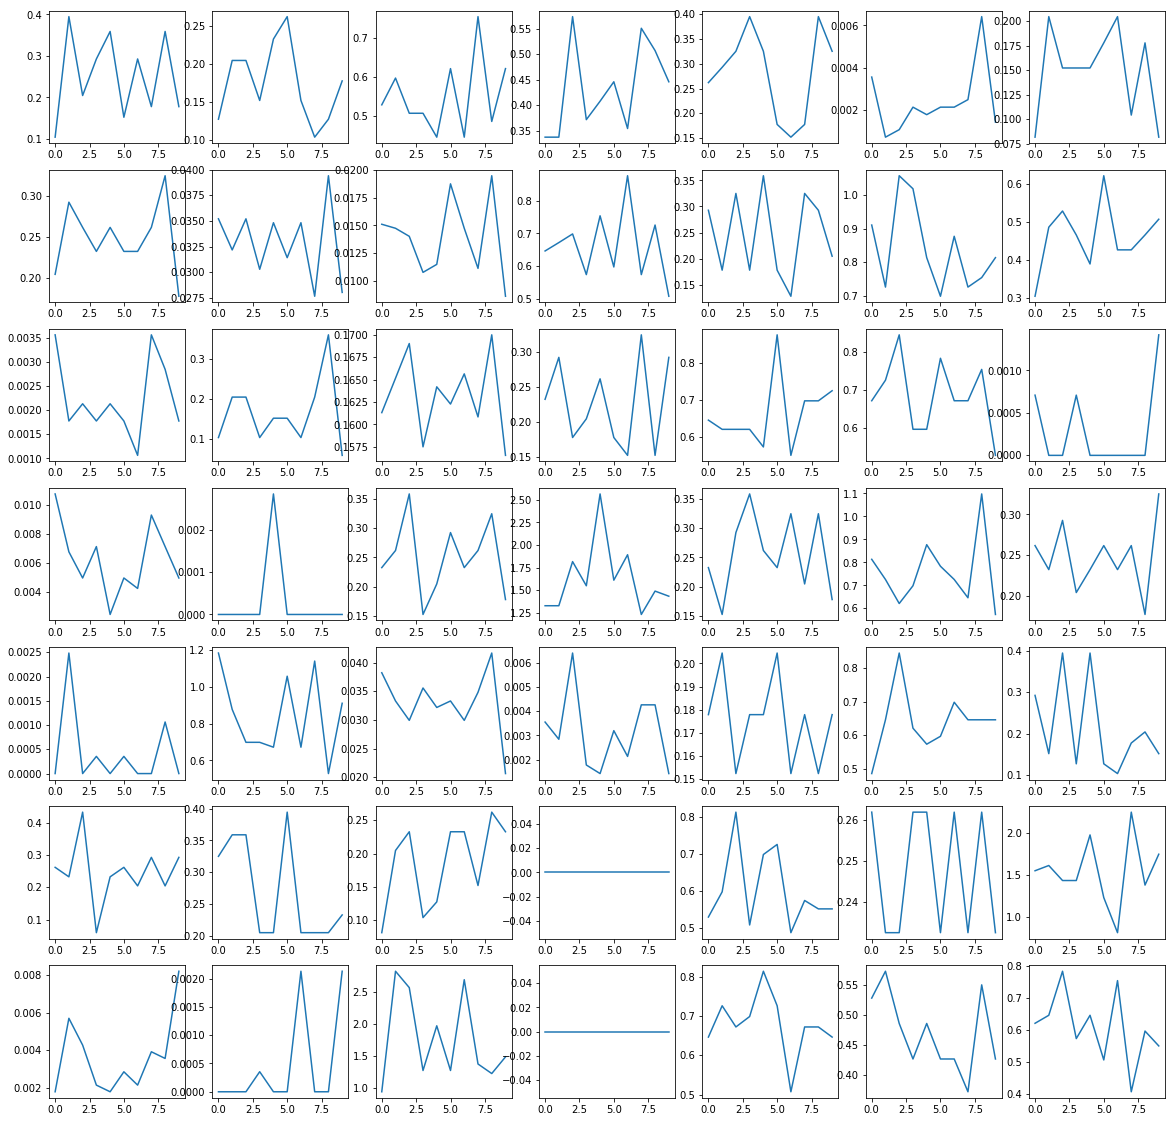

In [113]:

fig, ax = plt.subplots(7, 7,figsize=(20, 20))
column=0
row=0

for dictionary in dict0,dict20,dict20,dict33:
    for key, entry in dictionary.items():

        if row == 7:
            break;
          
        elements=entry.values.flatten().tolist()
        ax[row, column].plot(elements)
        
        if column==6:
            row+=1
            column=0
        else:
            column+=1
        
plt.show()        

In [139]:
from scipy import stats

noise_level=["0","10","20","33"]
noise_level_index=0

acceptances=0
rejects=0

for dictionary in dict0,dict10,dict20,dict33: #for noise_level 0% ,10% ,20% ,33%
    for dataset in ["Mushroom", "Glass","Appendicitis"]:
        for knn_neighbor_num in ["1","5","10","15","20","30","50"]:
            for distance_type in ["E", "M"]: # for Eucledean, Minkowski distance types
                knnResults= noise_level[noise_level_index]+"/"+knn_neighbor_num + distance_type+ "KNN"\
                    +dataset+noise_level[noise_level_index]+".csv"
                
                for model in ["dt","nb","svm"]:
                    otherModelResults= noise_level[noise_level_index]+"/"+\
                        model+dataset+noise_level[noise_level_index]+".csv"
                    
                    #print "\n\nComparing: ", knnResults," - ",otherModelResults
                    #paired-T test
                    stats.ttest_rel(dictionary[knnResults].values.flatten().tolist(),
                                    dictionary[otherModelResults].values.flatten().tolist())
                    
                    #Kolmogorov-Smirnov
                    #stats.ks_2samp(dictionary[knnResults].values.flatten().tolist(),\
                    #               dictionary[otherModelResults].values.flatten().tolist())
                                     
                    
                    #Wilcoxon
                    #stats.wilcoxon(dictionary[knnResults].values.flatten().tolist(),
                    #                dictionary[otherModelResults].values.flatten().tolist())
                    
                    if p > 0.05:
                        acceptances+=1
                    else:
                        rejects+=1
    noise_level_index+=1

print "Rejects: ", rejects
print "Acceptances: ", acceptances


Rejects:  0
Acceptances:  504


In [141]:
noise_level=["0","10","20","33"]
noise_level_index=0

acceptances=0
rejects=0

for dictionary in dict0,dict10,dict20,dict33: #for noise_level 0% ,10% ,20% ,33%
    for dataset in ["Mushroom", "Glass","Appendicitis"]:
        for knn_neighbor_num in ["1","5","10","15","20","30","50"]:
            for distance_type in ["E", "M"]: # for Eucledean, Minkowski distance types
                knn= noise_level[noise_level_index]+"/"+knn_neighbor_num + distance_type+ "KNN"\
                    +dataset+noise_level[noise_level_index]+".csv"
                
                svm=noise_level[noise_level_index]+"/"+\
                        "svm"+dataset+noise_level[noise_level_index]+".csv"
                nb=noise_level[noise_level_index]+"/"+\
                        "nb"+dataset+noise_level[noise_level_index]+".csv"
                dt=noise_level[noise_level_index]+"/"+\
                        "dt"+dataset+noise_level[noise_level_index]+".csv"
                
                #Friedman's test
                stats.friedmanchisquare(dictionary[knn].values.flatten().tolist(),
                    dictionary[svm].values.flatten().tolist(),
                    dictionary[dt].values.flatten().tolist(),
                    dictionary[nb].values.flatten().tolist())
                    
                    
                if p > 0.05:
                    acceptances+=1
                else:
                    rejects+=1
                    
    noise_level_index+=1

print "Rejects: ", rejects
print "Acceptances: ", acceptances


Rejects:  0
Acceptances:  168
